In [1]:
# !pip install -q netCDF4
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
#import xscale
# make a change

# load mooring data from AODN aggregated timeseries

In [2]:
#fname = 'http://thredds.aodn.org.au/thredds/dodsC/IMOS/ANMN/NSW/BMP120/aggregated_timeseries/IMOS_ANMN-NSW_TZ_20110329_BMP120_FV01_TEMP-aggregated-timeseries_END-20200327_C-20200519.nc'
#nc.to_netcdf('IMOS_ANMN-NSW_TZ_20110329_BMP120_FV01_TEMP-aggregated-timeseries_END-20200327_C-20200519.nc')

# mod 26/5 save data locally
# use local file
fname = 'IMOS_ANMN-NSW_TZ_20110329_BMP120_FV01_TEMP-aggregated-timeseries_END-20200327_C-20200519.nc'
nc = xr.open_dataset(fname)



In [3]:
# nc.NOMINAL_DEPTH[:5]
nc
#nc.TEMP.count()
# nc.LATITUDE.count()    378 points 378/13 = 29.07 ie 29 deployments 1 lat/long per logger
nc.LATITUDE.head(200)
# HOW TO PLOT THESE ON A MAP??

<xarray.DataArray 'LATITUDE' (INSTRUMENT: 200)>
array([-36.21525 , -36.21525 , -36.21525 , -36.21525 , -36.21525 , -36.21525 ,
       -36.21525 , -36.21525 , -36.21525 , -36.21525 , -36.21525 , -36.21525 ,
       -36.21525 , -36.21055 , -36.21055 , -36.21055 , -36.21055 , -36.21055 ,
       -36.21055 , -36.21055 , -36.21055 , -36.21055 , -36.21055 , -36.21055 ,
       -36.21055 , -36.21055 , -36.207383, -36.207383, -36.207383, -36.207383,
       -36.207383, -36.207383, -36.207383, -36.207383, -36.207383, -36.207383,
       -36.207383, -36.207383, -36.207383, -36.206483, -36.206483, -36.206483,
       -36.206483, -36.206483, -36.206483, -36.206483, -36.206483, -36.206483,
       -36.206483, -36.206483, -36.206483, -36.206483, -36.207667, -36.207667,
       -36.207667, -36.207667, -36.207667, -36.207667, -36.207667, -36.207667,
       -36.207667, -36.207667, -36.207667, -36.207667, -36.207667, -36.206217,
       -36.206217, -36.206217, -36.206217, -36.206217, -36.206217, -36.206217,
       -36.206217, -36.206217, -36.206217, -36.206217, -36.206217, -36.206217,
       -36.206   , -36.206   , -36.206   , -36.206   , -36.206   , -36.206   ,
       -36.206   , -36.206   , -36.206   , -36.206   , -36.206   , -36.206   ,
       -36.206   , -36.205017, -36.205017, -36.205017, -36.205017, -36.205017,
       -36.205017, -36.205017, -36.205017, -36.205017, -36.205017, -36.205017,
       -36.205017, -36.205017, -36.205533, -36.205533, -36.205533, -36.205533,
       -36.205533, -36.205533, -36.205533, -36.205533, -36.205533, -36.205533,
       -36.205533, -36.205533, -36.205533, -36.205533, -36.205533, -36.205533,
       -36.205533, -36.204817, -36.204817, -36.204817, -36.204817, -36.204817,
       -36.204817, -36.204817, -36.204817, -36.204817, -36.204817, -36.204817,
       -36.204817, -36.204817, -36.204817, -36.204817, -36.204817, -36.204817,
       -36.205583, -36.205583, -36.205583, -36.205583, -36.205583, -36.205583,
       -36.205583, -36.205583, -36.205583, -36.205583, -36.205583, -36.205583,
       -36.205583, -36.205583, -36.205583, -36.205583, -36.205583, -36.2052  ,
       -36.2052  , -36.2052  , -36.2052  , -36.2052  , -36.2052  , -36.206333,
       -36.206333, -36.206333, -36.206333, -36.206333, -36.206333, -36.206333,
       -36.206333, -36.206333, -36.206333, -36.206333, -36.206333, -36.206333,
       -36.206333, -36.206333, -36.206333, -36.206333, -36.20665 , -36.20665 ,
       -36.20665 , -36.20665 , -36.20665 , -36.20665 , -36.20665 , -36.20665 ,
       -36.20665 , -36.20665 , -36.20665 , -36.20665 , -36.20665 , -36.207183,
       -36.207183, -36.207183, -36.207183, -36.207183, -36.207183, -36.207183,
       -36.207183, -36.207183])
Coordinates:
    LATITUDE       (INSTRUMENT) float64 ...
    LONGITUDE      (INSTRUMENT) float64 ...
    NOMINAL_DEPTH  (INSTRUMENT) float32 ...
Dimensions without coordinates: INSTRUMENT
Attributes:
    reference_datum:  WGS84 geographic coordinate system
    standard_name:    latitude
    valid_max:        90.0
    units:            degrees_north
    axis:             Y
    valid_min:        -90.0
    long_name:        latitude

In [4]:
df = pd.DataFrame({'TIME': nc.TIME, 'TEMP': nc.TEMP, 'TEMPqc': nc.TEMP_quality_control, 'DEPTH' : nc.DEPTH}).set_index('TIME')
df.head(10)
df.tail(5)

,TEMP,TEMPqc,DEPTH
TIME,,,
2020-03-27 19:55:00.000001024,16.524523,1.0,98.585770
2020-03-27 20:00:00.000003328,16.544540,1.0,98.617599
2020-03-27 20:05:00.000005632,16.469830,1.0,98.613861
2020-03-27 20:10:00.000007936,16.505842,1.0,98.653618
2020-03-27 20:15:00.000000000,16.492502,1.0,98.641747


In [5]:
# df.head(10)
df.TEMP.count()

10584285

In [6]:
df.TEMPqc.value_counts()
# Count good data points - describe qc flags!!

1.0    10457390
3.0       93366
2.0       31155
4.0        2374
Name: TEMPqc, dtype: int64

In [7]:
df_good = df[df.TEMPqc == 1]
df_good.TEMPqc.value_counts()

1.0    10457390
Name: TEMPqc, dtype: int64

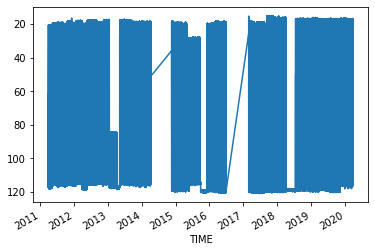

In [8]:
#have a look at the data distribution with depth.
df_good.DEPTH.plot()
plt.gca().invert_yaxis()
# df_good.DEPTH.plot.scatter('TIME','DEPTH') syntax 

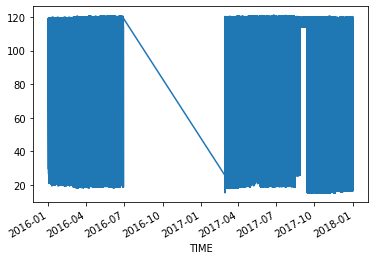

In [9]:
# and zoom in on a subset ???
df_good['2016':'2017'].DEPTH.plot()

#big data gaps - create a summary of this..

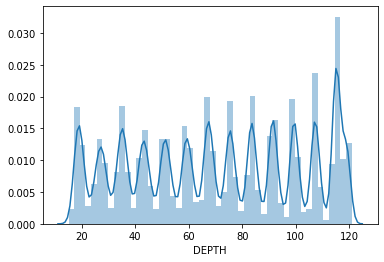

In [10]:
#get distribution of depths
sns.distplot(df_good['DEPTH'].dropna())

In [11]:
# zoom in on distribution of depths  - havent worked this out yet
# sns.distplot(df_good['DEPTH'].dropna())[20:40]
# sns.distplot(df_good['DEPTH'].dropna())['20':'40']
# TypeError: 'AxesSubplot' object is not subscriptable

In [12]:
# bin the data into depth bins (set inside the square brackets, using big bins for the moment to keep things simple), the 'labels' field gives the bins a name
#binned = pd.cut(x=df_good.DEPTH, bins=[-np.inf, 30, 60,80, np.inf], right=False, labels=['surface', '30-60', '60-80' , 'bottom'])
#grouped = df_good.groupby(binned)
#surface_temp_1D = grouped.get_group('surface').TEMP.resample('1D').mean()
#bottom_temp_1D = grouped.get_group('bottom').TEMP.resample('1D').mean()

In [13]:
# bin the data into depth bins (second pass)
#binned = pd.cut(x=df_good.DEPTH, bins=[-np.inf, 22, 30,38,46,54,62,70,78,86,94,102,110, np.inf], 
#                right=False, labels=['surface', '22-30', '30-38', '38-46', '46-54', '54-62', '62-70', 
#                                     '70-78', '78-86', '86-94', '94-102', '102-110' , 'bottom'])

In [14]:
# bin the data into depth bins (third pass)
binned = pd.cut(x=df_good.DEPTH, bins=[-np.inf, 24,32,40,48,56,64,72,81,89,97,105,112, np.inf], 
                right=False, labels=['surface', '24-32', '32-40', '40-48', '48-56', '56-64', '64-72', 
                                     '72-81', '81-89', '89-97', '97-105',  '105-112' , 'bottom'])



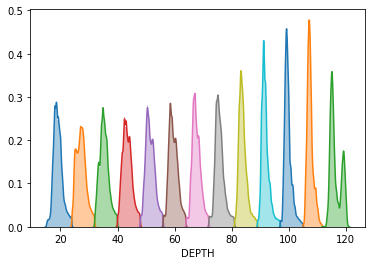

In [15]:
# plot all bins
grouped = df_good.groupby(binned)
sns.distplot(grouped.get_group('surface').DEPTH)
sns.distplot(grouped.get_group('24-32').DEPTH)
sns.distplot(grouped.get_group('32-40').DEPTH)
sns.distplot(grouped.get_group('40-48').DEPTH)
sns.distplot(grouped.get_group('48-56').DEPTH)
sns.distplot(grouped.get_group('56-64').DEPTH)
sns.distplot(grouped.get_group('64-72').DEPTH)
sns.distplot(grouped.get_group('72-81').DEPTH)
sns.distplot(grouped.get_group('81-89').DEPTH)
sns.distplot(grouped.get_group('89-97').DEPTH)
sns.distplot(grouped.get_group('97-105').DEPTH)
sns.distplot(grouped.get_group('105-112').DEPTH)
sns.distplot(grouped.get_group('bottom').DEPTH)

In [16]:
# Now create groups/variables according to these bins
surface_temp = grouped.get_group('surface').TEMP
bin24_32_temp = grouped.get_group('24-32').TEMP
bin32_40_temp = grouped.get_group('32-40').TEMP
#etc
bottom_temp = grouped.get_group('bottom').TEMP

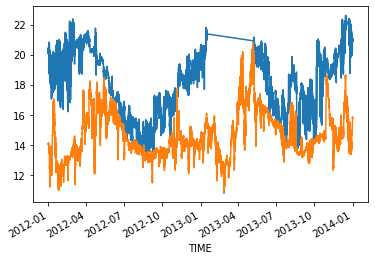

In [17]:
# Plot temps
surface_temp['2012':'2013'].plot()
bottom_temp['2012':'2013'].plot()

In [18]:
# Now compute 1 day mean
grouped = df_good.groupby(binned)
surface_temp_1D = grouped.get_group('surface').TEMP.resample('1D').mean()
bin32_40_temp_1D = grouped.get_group('32-40').TEMP.resample('1D').mean()
#etc
bottom_temp_1D = grouped.get_group('bottom').TEMP.resample('1D').mean()

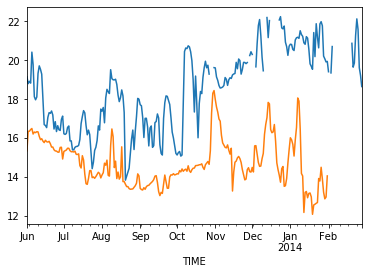

In [19]:
# Plot these
surface_temp_1D['2013-06':'2014-02'].plot()
bottom_temp_1D['2013-06':'2014-01'].plot()

In [34]:
# Get jiggy with graph

# Using plotly.express.. must rename df

import plotly.express as px
#df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')
# fig = px.line(df, x='Date', y='Temp') ..nope
# fig = px.line(df)  ..maybe
fig = px.line(surface_temp_1D,  y = "TEMP", title = 'graph1')
fig.show()
fig = px.line(bottom_temp_1D)
fig.show()


In [36]:
# How to overlay these
fig = px.line(surface_temp_1D, bottom_temp_1D,  y = "TEMP", title = 'graph2')
fig.show()

#fig = px.line(df, x="year", y="lifeExp", color='country')

In [40]:
# Holy crap thats not it . need to specify time vs temp??

#fig = px.line(surface_temp_1D, bottom_temp_1D,  x = "TIME",y = "TEMP", title = 'graph3') ...nope

# Question. Is surface_temp_ID still in df_good?
# Can i plot it as a subset of df_good? ie
fig = px.line(df_good, x="TIME", y="TEMP", color='BIN')

#or something like this... ?

df_good[["surface_temp_1D", "bottom_temp_1D"]].plot(subplots=True, figsize=(15,4))

fig.show()




ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['TEMP', 'TEMPqc', 'DEPTH'] but received: TIME

KeyError: "['TIME'] not in index"

In [ ]:
# Compute the centered 7-day rolling mean
surface_temp_7D = surface_temp_1D.rolling(7, center=True,min_periods=1).mean()
bottom_temp_7D = bottom_temp_1D.rolling(7, center=True,min_periods=1).mean()

#Compute the centered 365-day rolling mean
surface_temp_1Y = surface_temp_1D.rolling(730, center=True, win_type='hamming',min_periods=100).mean()
bottom_temp_1Y = bottom_temp_1D.rolling(730, center=True, win_type='hamming',min_periods=100).mean()

In [ ]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(surface_temp_1D, marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(surface_temp_7D, linewidth=2, label='7-d Rolling Mean')
ax.plot(surface_temp_1Y, color='0.2', linewidth=3, label='Trend (365-d Rolling Mean')
# Set x-ticks to yearly interval and add legend and labels
#ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')
ax.set_title('20m Temperature at BMP 120');
#plt.savefig('BMP120_20m_temperature_tseries.png', dpi=300,bbox_inches='tight')

In [ ]:
surface_temp_7D['2012-7':'2013'].plot(label='7D')
surface_temp_1D['2012-7':'2013'].plot(label='1D')
depth24_32_temp_1D['2012-7':'2013'].plot(label='bin2')
plt.legend()



In [ ]:
surface['2012':'2013'].plot()

In [ ]:
# NO LONGER 80-120
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(bottom_temp_1D, marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(bottom_temp_7D, linewidth=2, label='7-d Rolling Mean')
ax.plot(bottom_temp_1Y, color='0.2', linewidth=3, label='Trend (365-d Rolling Mean')
# Set x-ticks to yearly interval and add legend and labels
#ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')
ax.set_title('80-120m Temperature at BMP 120');
plt.savefig('BMP120_80-120m_temperature_tseries.png', dpi=300,bbox_inches='tight')

In [ ]:
# NO LONGER 80-120
# resample at monthly, remove seasonal cycle, add 2 year filter
surface_temp_1M = grouped.get_group('surface').TEMP.resample('1M').mean()
bottom_temp_1M = grouped.get_group('bottom').TEMP.resample('1M').mean()

surface_temp_1M_filt = surface_temp_1M.rolling(24, center=True, win_type='hamming',min_periods=3).mean()
bottom_temp_1M_filt = bottom_temp_1M.rolling(24, center=True, win_type='hamming',min_periods=3).mean()

# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(surface_temp_1M, linewidth=2, label='Montly mean')
ax.plot(surface_temp_1M_filt, color='0.2', linewidth=3, label='Trend (2-year Filtered')
# Set x-ticks to yearly interval and add legend and labels
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')
ax.set_title('80-120m Temperature at BMP 120');

In [ ]:
# OK, so this works, but if we want to keep things consistent with the SST analysis, and for gapfilling lets rather convert to an Xarray dataset and proceed from there.
DA_surfacetemp = surface_temp_1D.to_xarray()
ds = DA_surfacetemp.to_dataset()
ds = ds.rename({'TIME': 'time'})
ds

In [ ]:
# Remove seasonal cycle

def xarray_trend(xarr):
    """
    Calculates the trend of the data along the 'time' dimension
    of the input array (xarr).
    USAGE:  x_DS = xarray_trend(xarr)
    INPUT:  xarr is an xarray DataArray with dims:
                time, [lat, lon]
                where lat and/or lon are optional
    OUTPUT: xArray Dataset with:
                original xarr input
                slope
                p-value
    TODO?
    There could be speed improvements (using numpy at the moment)
    """

    from scipy import stats
    # getting shapes

    n = xarr.shape[0]

    # creating x and y variables for linear regression
    x = xarr.time.to_pandas().index.to_julian_date().values[:, None]
    y = xarr.to_masked_array().reshape(n, -1)

    # ############################ #
    # LINEAR REGRESSION DONE BELOW #
    xm = x.mean(0)  # mean
    ym = y.mean(0)  # mean
    ya = y - ym  # anomaly
    xa = x - xm  # anomaly

    # variance and covariances
    xss = (xa ** 2).sum(0) / (n - 1)  # variance of x (with df as n-1)
    yss = (ya ** 2).sum(0) / (n - 1)  # variance of y (with df as n-1)
    xys = (xa * ya).sum(0) / (n - 1)  # covariance (with df as n-1)
    # slope and intercept
    slope = xys / xss
    # statistics about fit
    df = n - 2
    r = xys / (xss * yss)**0.5
    t = r * (df / ((1 - r) * (1 + r)))**0.5
    p = stats.distributions.t.sf(abs(t), df)

    # misclaneous additional functions
    # intercept = ym - (slope * xm)
    # yhat = dot(x, slope[None]) + intercept
    # sse = ((yhat - y)**2).sum(0) / (n - 2)  # n-2 is df
    # se = ((1 - r**2) * yss / xss / df)**0.5

    # preparing outputs
    out = xarr.to_dataset(name=xarr.name)
    # first create variable for slope and adjust meta
    out['slope'] = xarr[:2].mean('time').copy()
    out['slope'].name += '_slope'
    out['slope'].attrs['units'] = 'units / day'
    out['slope'].values = slope.reshape(xarr.shape[1:])
    # do the same for the p value
    out['pval'] = xarr[:2].mean('time').copy()
    out['pval'].name += '_Pvalue'
    out['pval'].values = p.reshape(xarr.shape[1:])
    out['pval'].attrs['info'] = ("If p < 0.05 then the results "
                                 "from 'slope' are significant.")

    return out

In [ ]:
climatology = ds.TEMP.groupby('time.month').mean('time')
anomalies = ds.TEMP.groupby('time.month') - climatology
climatology.plot()
#get linear trend
trend = xarray_trend(ds.TEMP)
plt.suptitle("BMP120 20m seasonal cycle")
plt.savefig('BMP120_20m_seasonal_cycle.png', dpi=300,bbox_inches='tight')
trend

In [ ]:
decade_trend = trend.slope*3650
decade_trend

In [ ]:
BMP_120_anomalies = anomalies
BMP_120_anomalies.plot()
BMP_120_anomalies.to_netcdf

In [ ]:
y = surface_temp_1D.fillna(surface_temp_1D.ffill())
sns.distplot(y)

In [ ]:
# NO LONGER 80-120
# Plot all
fig, ax = plt.subplots()
ax.plot(bottom_temp_1D, marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(bottom_temp_7D, linewidth=2, label='7-d Rolling Mean')
# Set x-ticks to yearly interval and add legend and labels
#ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')
ax.set_title(' Temperature at BMP 120');
plt.savefig('BMP120_80-120m_temperature_tseries.png', dpi=300,bbox_inches='tight')

In [ ]:
# NO LONGER 80-120
# Plot 1 year
fig, ax = plt.subplots()
ax.plot(bottom_temp_1D, marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
# ax.plot(bottom_temp_7D, linewidth=2, label='7-d Rolling Mean')
# Set x-ticks to yearly interval and add legend and labels
#ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Temperature')
ax.set_title('80-120m Temperature at BMP 120');
plt.savefig('BMP120_80-120m_temperature_tseries.png', dpi=300,bbox_inches='tight')